This notebook outlines an engineering-economic assessment method for a global LEO satellite network.

The aim is to assess capacity per user and cost per user. 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import csv
import pandas as pd

Path Loss for A point on Earth and Starlink is given by
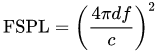
Where d=antenna diameter, f=frequency and c= speed of light

### Antenna Gain

In [2]:
def GT(D,f,n): #D=Antenna diameter in m, f=Frequency in Hertz and n= antenna efficiency usually 0.6
    c=3.0*10**8 #c=speed of light
    λ=c/f # lambda= wavelength of the signal
    gain=10*(math.log10(n*((np.pi*D)/λ)**2))
    return gain
D=0.7 #float(input("Enter Antenna Diameter in metres: "))
f=13.5 #float(input("Enter the signal frequency in GHz: "))
n=0.6 #float(input("Enter the Antenna Efficiency: "))'''
GT=37.7
print('Antenna Gain= '+str(GT)+ ' dB')

Antenna Gain= 37.7 dB


### Effective Isotropic Radiated Power (EIRP)

In [141]:
EIRP=36.7+30 #round(EIRP(),4)
print('EIRP= '+str(EIRP)+ ' dB')

EIRP= 66.7 dB


### Rain Attenuation (AL) and Other Losses (OL)

The rain attenuation is assumed to be 10dB as well as other losses thus accounting for 20dB in total.

In [142]:
RT=10 #float(input("Enter Rain Attenuation (dB): ")) #Rainfall Attenuation
'''GST=0#float(input("Enter Gaseous Attenuation (dB): ")) #Gaseous Attenuation
CT=0#float(input("Enter Cloud Attenuation (dB): ")) #Cloud Attenuation
ST=0#float(input("Scintillation Attenuation (dB): ")) #Scintillation Attenuation'''
OT=0.53#float(input("Enter Sum of other losses (dB): ")) # Other losses
TL=RT+OT                                                #TL=Total Losses
print('Total Losses= '+str(TL)+ ' dB')

Total Losses= 10.53 dB


### Noise Power (N)

In [134]:
def Noise():
    k=1.38*10**-23                     #Boltzmann's constant k = 1.38×10−23 joules per kelvin
    T=290                              #Temperature of the receiver system T0 in kelvins
    B=0.25                             #Detection bandwidth (BW) in Hz
    Np=(10*(math.log10((k*T*1000))))+(10*(math.log10(B*10**9))) #Np=Noise power
    return Np
Noise=Noise()
print('Noise Power= '+str(Noise)+ ' dB')

Noise Power= -89.9978290702777 dB


### POWER RECEIVED (PR)

In [143]:
FSLP=0               #Ignoring FSLP at first so that it can be calculated for different values
def PR():
    pr=EIRP+GT-FSLP-TL
    return pr
PR=PR()
print('Power Received= '+str(PR)+ ' dB')

Power Received= 93.87 dB


### CARRIER TO NOISE RATIO (CNR)

In [144]:
Noise=-89.9978
CNR=round(float((PR)-(Noise)),4)
print('CNR= '+str(CNR)+ ' dB')

CNR= 183.8678 dB


#### LEO SYSTEM MODEL APPLIED TO STARLINK

In [ ]:
The subsequent function calculates the Signal to Noise Ratio, Received power and Free Space Path loss as dif

In [3]:
def starlink_capacity(Number_of_assets):
    Total_Earth_Area=510000000                      #Area of Earth
    Asset_Altitude=550                              #Altitude of starlink satellites
    Downlink_Frequency=13.5*10**9                   #Downlink frequency in Hertz
    Speed_of_light=3.0*10**8                        #Speed of light in vacuum
    wavelength=Speed_of_light/Downlink_Frequency    #Downlink Wavelength in m
    Received_power_less_FSLP=93.87                  #Received power before subtracting Free space path loss
    Carrier_to_Noise_Ratio=183.8678                 #Carrier noise ratio before subtracting noise power
    Earth_area_covered=Total_Earth_Area*0.8         #Approximate area of earth covered
    NoA=[]  #Empty array to store the number of assets
    CPUA=[] #Empty array to store the coverage per user asset
    ADA=[]  #Empty array to store Average distance between assets
    MPD=[]  #Empty array to store Maximum path distance
    FSPL=[] #Empty array to store Free Space path loss
    PR=[]   #Empty array to store Received_power
    SNR=[]  #Empty array to store Signal to Noise Ratio
    for noa in Number_of_assets: #Return results for NoA, CPUA,ADA,MPD,FSPL,PR and SNR as satellites increase by 60
        Network_Density=noa/Earth_area_covered
        Coverage_area_per_asset=Earth_area_covered/noa
        Average_distance_between_assets=math.sqrt(((1)/Network_Density))/(2)
        Max_path_distance=math.sqrt(((Average_distance_between_assets)**2)+((Asset_Altitude)**2))
        Free_Space_path_loss=10*(math.log10(((4*np.pi*Max_path_distance*10**3)/wavelength)**2))
        Received_power=Received_power_less_FSLP-Free_Space_path_loss
        Signal_to_Noise_Ratio=Carrier_to_Noise_Ratio-Free_Space_path_loss
        
        #Store the output as lists
        NoA.append(Network_Density)
        CPUA.append(Coverage_area_per_asset)
        ADA.append(Average_distance_between_assets)
        MPD.append(Max_path_distance)
        FSPL.append(Free_Space_path_loss)
        PR.append(Received_power)
        SNR.append(Signal_to_Noise_Ratio)
    return NoA,CPUA,ADA,MPD,FSPL,PR,SNR

satellites=(np.linspace(60,5040,84)).tolist() #Increase the satellites by 60 until 5000 have been launched
Number_of_assets=satellites
starlink_capacity(Number_of_assets) 

([1.4705882352941175e-07,
  2.941176470588235e-07,
  4.411764705882353e-07,
  5.88235294117647e-07,
  7.352941176470589e-07,
  8.823529411764706e-07,
  1.0294117647058823e-06,
  1.176470588235294e-06,
  1.323529411764706e-06,
  1.4705882352941177e-06,
  1.6176470588235295e-06,
  1.7647058823529412e-06,
  1.9117647058823528e-06,
  2.0588235294117645e-06,
  2.2058823529411763e-06,
  2.352941176470588e-06,
  2.5e-06,
  2.647058823529412e-06,
  2.7941176470588237e-06,
  2.9411764705882355e-06,
  3.0882352941176472e-06,
  3.235294117647059e-06,
  3.3823529411764707e-06,
  3.5294117647058825e-06,
  3.6764705882352942e-06,
  3.8235294117647055e-06,
  3.970588235294117e-06,
  4.117647058823529e-06,
  4.264705882352941e-06,
  4.4117647058823526e-06,
  4.558823529411764e-06,
  4.705882352941176e-06,
  4.852941176470589e-06,
  5e-06,
  5.147058823529412e-06,
  5.294117647058824e-06,
  5.441176470588236e-06,
  5.588235294117647e-06,
  5.735294117647059e-06,
  5.882352941176471e-06,
  6.02941176470